In [1]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
train_data_dir = "train"
validation_data_dir = "val1"
img_width, img_height = 224, 224

In [4]:
# Data Augmentation (Adjust as needed)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Load pre-trained VGG16 model (without top layers)
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(img_height, img_width, 3))

# Freeze pre-trained layers (optional)
for layer in base_model.layers:
  layer.trainable = False

# Add custom layers for classification
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)  # Adjust number of units if needed
x = Dropout(0.5)(x)  # Add dropout for regularization
predictions = Dense(10, activation="softmax")(x)  # Adjust for your number of classes

# Create final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.0001), metrics=["accuracy"])

# Callbacks
early_stopping = EarlyStopping(monitor="val_loss", patience=3)
model_checkpoint = ModelCheckpoint("best_vgg16_model.h5", save_best_only=True)

# Train the model
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=16,  # Adjust batch size as needed
    class_mode="categorical"
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=16,
    class_mode="categorical"
)

d:\mainfolders\programcodestuff\gigs\driver_distraction_sheenamaam\train_scriptvgg16\vgg16env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Found 14096 images belonging to 10 classes.
Found 6047 images belonging to 10 classes.


In [5]:
history = model.fit(
    train_generator,
    epochs=30,  # Adjust epochs as needed
    validation_data=validation_generator,
)

Epoch 1/30
441/441 [==============================] - 174s 384ms/step - loss: 1.0297 - accuracy: 0.6720 - val_loss: 0.2711 - val_accuracy: 0.9477
Epoch 2/30
441/441 [==============================] - 164s 371ms/step - loss: 0.3096 - accuracy: 0.9169 - val_loss: 0.1588 - val_accuracy: 0.9611
Epoch 3/30
441/441 [==============================] - 164s 371ms/step - loss: 0.2091 - accuracy: 0.9421 - val_loss: 0.1031 - val_accuracy: 0.9691
Epoch 4/30
441/441 [==============================] - 165s 374ms/step - loss: 0.1522 - accuracy: 0.9600 - val_loss: 0.0637 - val_accuracy: 0.9848
Epoch 5/30
441/441 [==============================] - 166s 375ms/step - loss: 0.1273 - accuracy: 0.9651 - val_loss: 0.1114 - val_accuracy: 0.9635
Epoch 6/30
441/441 [==============================] - 165s 373ms/step - loss: 0.1118 - accuracy: 0.9675 - val_loss: 0.0444 - val_accuracy: 0.9884
Epoch 7/30
441/441 [==============================] - 168s 381ms/step - loss: 0.1026 - accuracy: 0.9702 - val_loss: 0.0590 -

In [6]:
# Evaluate the model on the validation set (optional)
loss, accuracy = model.evaluate_generator(validation_generator)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

C:\Temp\ipykernel_4176\3928011442.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss, accuracy = model.evaluate_generator(validation_generator)


Validation Loss: 0.021820630878210068
Validation Accuracy: 0.9950388669967651


In [7]:
model.save("model_vgg16_30epochs.h5")

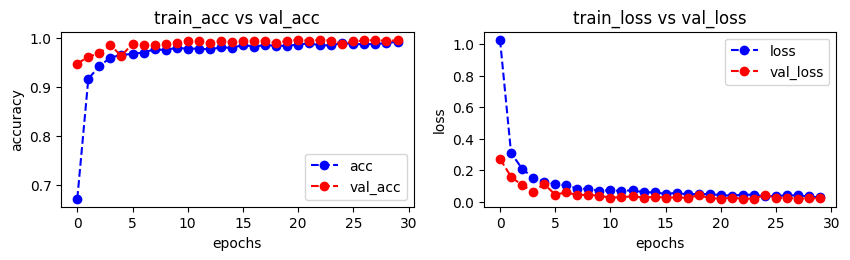

In [8]:
import matplotlib.pyplot as plt

def plot(history):
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'], 'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()
    
    #Plot Loss function
    plt.subplot(222)
    plt.plot(history.history['loss'], 'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()
plot(history)